# Financial Sustainability of Art Museums
## Data Mining Final Project
Liam Sweeney

In this project I use art museum finance data which has been scraped from public 990s, and explore which features are most likely to predict financial sustainability. This notebook is composed of the following sections: Data Input, Pre processing, Correlation analysis, Fitting the model, Classification report, Tuning hyperparameters, Validation accuracy, Feature importance, Visualization, and Conclusion. I have chosen to use a decision tree for this project, because I want to understand which features in the dataset are most likely to inform the financial sustainability of the institution, so that decision makers can use this evidence to make more informed decisions for their organizations. Throughout the notebook I will explain the choices and outcomes. I frequently pause to check on how code has changed the dataset in order to develop a familiarity with the changes that have occurred. Analysis finds that land, building, and equipment costs is the most important feature for predicting financial sustainability. Tuning hyperparameters improves the model so it is more accurate than a random baseline. 

## Data Input
This data comes from publicly available 990s, and includes over 2000 rows reflecting art museums over roughly a decade of tax years. Each art museum's tax year is one row, so it is common for a museum to have between five and ten records, depending on the available tax records. There are over 200 features, many with missing data, and many that are not relevant to predicting the target variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/liamsweeney/streamlit_apps/Museum_Finances/aam_Ithaka_art_museum_export_23_Feb_2022.csv")

In [3]:
df.head()

,aptify_id,name,tax_year,tax_period_ending,year_formation,total_employees,total_volunteers,total_contributions,total_program_service_revenue,investment_income,...,program_service_revenue__0__related_or_exempt_function_income,identifier,program_service_accomplishments__9__expenses,miscellaneous_revenue__1__description,website,program_service_accomplishments__12__description,program_service_accomplishments__5__grant,miscellaneous_revenue__1__unrelated_business_revenue,program_service_accomplishments__15__grant,program_service_accomplishments__4__revenue
0,27703,KAUAI MUSEUM ASSOCIATION LTD,2019,9/30/20,1922.0,15,12.0,336408.0,129511.0,620.0,...,NaN,990105151-2021-202009-202110089349301441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27703,KAUAI MUSEUM ASSOCIATION LTD,2018,9/30/19,1922.0,12,50.0,440618.0,239838.0,3694.0,...,NaN,990105151-2020-201909-202030299349300818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27703,KAUAI MUSEUM ASSOCIATION LTD,2017,9/30/18,1922.0,12,50.0,227539.0,297833.0,96797.0,...,NaN,990105151-2019-201809-201930329349301423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27703,KAUAI MUSEUM ASSOCIATION LTD,2016,9/30/17,1922.0,17,50.0,328098.0,228831.0,11816.0,...,NaN,990105151-2018-201709-201713499349300716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27703,KAUAI MUSEUM ASSOCIATION LTD,2015,9/30/16,1922.0,16,50.0,353358.0,248190.0,11409.0,...,NaN,990105151-2017-201609-201623379349300142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Columns: 211 entries, aptify_id to program_service_accomplishments__4__revenue
dtypes: bool(1), float64(143), int64(22), object(45)
memory usage: 3.4+ MB


## Pre-processing the Data
Feature reduction is going to be very important for developing a strong model. In my first pass at pre-processing the data, I reviewed the data to get a sense of whether there was sufficient data available in the column, whether that data would likely be relevant to the research question, and whether there might be reduncancies. This was done in Excel and could be revisited in a more systematic way, but was a useful first cut to get the dataset into reasonable shape. As a result, I dropped the following columns:

In [5]:
df.drop(["program_service_accomplishments__7__grant", 
"other_expenses__5__fundraising", 
"other_expenses__0__management_and_general", 
"other_expenses__5__description", 
"program_service_revenue__3__related_or_exempt_function_income", 
"program_service_accomplishments__3__revenue", 
"gross_income_fundrasing_events", 
"_id", 
"other_expenses__4__management_and_general", 
"other_expenses__2__management_and_general", 
"program_service_accomplishments__11__expenses", 
"program_service_accomplishments__13__grant", 
"miscellaneous_revenue__0__revenue", 
"other_expenses__5__program_services", 
"investments_other_securities", 
"program_service_accomplishments__11__revenue", 
"program_service_accomplishments__4__grant", 
"miscellaneous_revenue__0__description", 
"program_service_accomplishments__13__description", 
"program_service_accomplishments__17__description", 
"program_service_revenue__2__revenue", 
"program_service_accomplishments__6__expenses", 
"program_service_revenue__0__exclusion", 
"program_service_accomplishments__8__grant", 
"program_service_accomplishments__14__grant", 
"other_expenses__4__fundraising", 
"program_service_revenue__2__related_or_exempt_function_income", 
"program_service_revenue__1__unrelated_business_revenue", 
"investments_program_related", 
"program_service_accomplishments__11__description", 
"program_service_revenue__2__unrelated_business_revenue", 
"program_service_revenue__3__exclusion", 
"miscellaneous_revenue__3__exclusion", 
"program_service_revenue__3__revenue", 
"program_service_accomplishments__15__revenue", 
"program_service_revenue__0__unrelated_business_revenue", 
"program_service_accomplishments__15__expenses", 
"miscellaneous_revenue__2__exclusion", 
"program_service_revenue__4__exclusion", 
"program_service_accomplishments__15__description", 
"program_service_revenue__3__unrelated_business_revenue", 
"program_service_accomplishments__6__description", 
"program_service_accomplishments__17__grant", 
"program_service_accomplishments__13__revenue", 
"program_service_revenue__4__unrelated_business_revenue", 
"program_service_accomplishments__2__expenses", 
"program_service_accomplishments__1__revenue", 
"other_expenses__1__fundraising", 
"program_service_accomplishments__10__description", 
"program_service_accomplishments__14__expenses", 
"program_service_accomplishments__6__revenue", 
"program_service_accomplishments__8__revenue", 
"miscellaneous_revenue__2__related_or_exempt_function_income", 
"program_service_revenue__4__revenue", 
"miscellaneous_revenue__2__unrelated_business_revenue", 
"program_service_accomplishments__1__grant", 
"form_type", 
"program_service_accomplishments__10__revenue", 
"program_service_accomplishments__10__grant", 
"miscellaneous_revenue__0__exclusion", 
"fundrasing_events", 
"program_service_accomplishments__17__revenue", 
"program_service_accomplishments__9__revenue", 
"program_service_accomplishments__7__description", 
"membership_status", 
"program_service_accomplishments__12__revenue", 
"program_service_accomplishments__17__expenses", 
"miscellaneous_revenue__1__revenue", 
"program_service_accomplishments__6__grant", 
"program_service_accomplishments__3__description", 
"program_service_accomplishments__12__expenses", 
"program_service_accomplishments__9__description", 
"program_service_accomplishments__4__description", 
"program_service_accomplishments__3__grant", 
"program_service_accomplishments__11__grant", 
"program_service_accomplishments__14__description", 
"program_service_accomplishments__10__expenses", 
"miscellaneous_revenue__2__description", 
"program_service_accomplishments__0__grant", 
"miscellaneous_revenue__0__related_or_exempt_function_income", 
"other_expenses__5__management_and_general", 
"miscellaneous_revenue__2__revenue", 
"program_service_accomplishments__5__expenses", 
"program_service_accomplishments__8__expenses", 
"miscellaneous_revenue__3__revenue", 
"program_service_accomplishments__7__expenses", 
"program_service_accomplishments__16__grant", 
"program_service_revenue__4__related_or_exempt_function_income", 
"program_service_accomplishments__16__description", 
"program_service_revenue__2__description", 
"miscellaneous_revenue__0__unrelated_business_revenue", 
"other_expenses__2__fundraising", 
"program_service_accomplishments__5__revenue", 
"other_expenses__1__management_and_general", 
"program_service_accomplishments__2__description", 
"program_service_accomplishments__9__grant", 
"program_service_accomplishments__16__expenses", 
"other_expenses__0__fundraising", 
"program_service_accomplishments__3__expenses", 
"program_service_accomplishments__13__expenses", 
"miscellaneous_revenue__3__description", 
"miscellaneous_revenue__1__related_or_exempt_function_income", 
"program_service_revenue__2__exclusion", 
"program_service_accomplishments__8__description", 
"net_rental_income", 
"program_service_accomplishments__16__revenue", 
"program_service_revenue__3__description", 
"miscellaneous_revenue__3__unrelated_business_revenue", 
"ein", 
"program_service_accomplishments__14__revenue", 
"program_service_revenue__1__exclusion", 
"miscellaneous_revenue__3__related_or_exempt_function_income", 
"program_service_accomplishments__2__revenue", 
"program_service_accomplishments__4__expenses", 
"other_expenses__3__fundraising", 
"other_expenses__5__expenses", 
"program_service_accomplishments__2__grant", 
"tax_period_begin", 
"alt_name", 
"program_service_accomplishments__12__grant", 
"other_expenses__3__management_and_general", 
"program_service_accomplishments__5__description", 
"program_service_revenue__4__description", 
"miscellaneous_revenue__1__exclusion", 
"identifier", 
"program_service_accomplishments__9__expenses", 
"miscellaneous_revenue__1__description", 
"program_service_accomplishments__12__description", 
"program_service_accomplishments__5__grant", 
"miscellaneous_revenue__1__unrelated_business_revenue", 
"program_service_accomplishments__15__grant", 
"program_service_accomplishments__4__revenue"], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 79 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   aptify_id                                                      2116 non-null   int64  
 1   name                                                           2116 non-null   object 
 2   tax_year                                                       2116 non-null   int64  
 3   tax_period_ending                                              2116 non-null   object 
 4   year_formation                                                 2075 non-null   float64
 5   total_employees                                                2116 non-null   int64  
 6   total_volunteers                                               2019 non-null   float64
 7   total_contributions                                         

I see there are still some variables that have a lot of null values, so I want to remove those with a line of code. I choose 1700 because it seems like going above that would eliminate too many features, so it is the highest threshold I can have without significantly limiting the dataset. 

In [7]:
non_null_threshold = 1700

df.dropna(thresh=non_null_threshold, axis=1, inplace=True)

In [8]:
column_axis = df.columns

In [9]:
column_labels = column_axis.tolist()
print(column_labels)

['aptify_id', 'name', 'tax_year', 'tax_period_ending', 'year_formation', 'total_employees', 'total_volunteers', 'total_contributions', 'total_program_service_revenue', 'investment_income', 'other_revenue', 'total_revenue', 'personnel_expenses', 'total_expenses', 'revenue_less_expenses', 'total_assets', 'total_liabilities', 'net_assets', 'other_expenses__0__expenses', 'total_functional_expenses', 'other_expenses__4__program_services', 'other_expenses__4__expenses', 'other_salaries_and_wages', 'land_bldg_equip_cost_or_other_basis', 'unrestricted_net_assets', 'program_service_accomplishments__0__revenue', 'total_liabilities_net_assets_fund_balances', 'total_statement_functional_management_and_general_expenses', 'occupancy', 'advertising', 'total_statement_functional_fundrasing_expenses', 'activity_mission_description', 'net_income', 'other_expenses__2__expenses', 'program_service_revenue__0__revenue', 'other_expenses__2__program_services', 'net_income_or_loss', 'program_service_accomplish

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   aptify_id                                                      2116 non-null   int64  
 1   name                                                           2116 non-null   object 
 2   tax_year                                                       2116 non-null   int64  
 3   tax_period_ending                                              2116 non-null   object 
 4   year_formation                                                 2075 non-null   float64
 5   total_employees                                                2116 non-null   int64  
 6   total_volunteers                                               2019 non-null   float64
 7   total_contributions                                         

In [11]:
num_columns = df.shape[1]
print(num_columns)


70


After exploring the changed dataset, I now want to create a target variable. I've decided that the target will be "revenue_less_expenses" (RLE), which measures the difference of total revenue versus total expenses. From looking at the data in excel, it seems like there is a fairly even split between museums having RLE in the positive vs in the negative. I create the conditional argument for the target variable using np.where, so that if the target is positive it will get a 0 and if it is negative it will get a 1. 

In [12]:
df['target'] = np.where(df['revenue_less_expenses'] > 0, 0, 1)

In [13]:
counts = df['target'].value_counts()

In [14]:
count_0 = counts[0]
count_1 = counts[1]

In [15]:
print("Count of 0s:", count_0)
print("Count of 1s:", count_1)

Count of 0s: 1191
Count of 1s: 925


There are over 1100 museums with positive RLE and over 900 with negative RLE. This seems like a good distribution for a target variable becuase it is not too skewed one way or the other.

Now I want to address the missing values in the dataset. First I am going to explore how many columns we are talking about. 

In [16]:
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
Index(['year_formation', 'total_volunteers', 'total_contributions',
       'total_program_service_revenue', 'investment_income', 'total_expenses',
       'other_expenses__0__expenses', 'other_expenses__4__program_services',
       'other_expenses__4__expenses', 'other_salaries_and_wages',
       'land_bldg_equip_cost_or_other_basis', 'unrestricted_net_assets',
       'program_service_accomplishments__0__revenue', 'occupancy',
       'advertising', 'other_expenses__2__expenses',
       'program_service_revenue__0__revenue',
       'other_expenses__2__program_services', 'net_income_or_loss',
       'other_expenses__1__program_services',
       'other_expenses__3__program_services',
       'program_service_revenue__1__description',
       'other_expenses__0__description', 'other_expenses__2__description',
       'cash_non_interest_bearing',
       'program_service_accomplishments__0__expenses',
       'program_service_revenue__1__related_or_exempt_function_inc

Next, which of these are strings and which are numerical?

In [17]:
for column in df.columns:
    column_type = df[column].dtype
    if column_type == 'object':
        print(f"{column}: string")
    else:
        print(f"{column}: number")

aptify_id: number
name: string
tax_year: number
tax_period_ending: string
year_formation: number
total_employees: number
total_volunteers: number
total_contributions: number
total_program_service_revenue: number
investment_income: number
other_revenue: number
total_revenue: number
personnel_expenses: number
total_expenses: number
revenue_less_expenses: number
total_assets: number
total_liabilities: number
net_assets: number
other_expenses__0__expenses: number
total_functional_expenses: number
other_expenses__4__program_services: number
other_expenses__4__expenses: number
other_salaries_and_wages: number
land_bldg_equip_cost_or_other_basis: number
unrestricted_net_assets: number
program_service_accomplishments__0__revenue: number
total_liabilities_net_assets_fund_balances: number
total_statement_functional_management_and_general_expenses: number
occupancy: number
advertising: number
total_statement_functional_fundrasing_expenses: number
activity_mission_description: string
net_income: n

Lets drop all the strings, since they are for the most part not going to be helpful in predicting the target. It is possible in a future iteration of the project there could be an attempt to code some of these and see if they are meaningful.

In [18]:
string_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        string_columns.append(column)

# Drop the string columns
df_dropped = df.drop(string_columns, axis=1)

I've just created df_dropped, and now I'm going to change it to df_filled and fill in all the missing values with the mean of the column. 

In [19]:
df_filled = df_dropped.fillna(df_dropped.mean())

In [20]:
df_filled.head()

,aptify_id,tax_year,year_formation,total_employees,total_volunteers,total_contributions,total_program_service_revenue,investment_income,other_revenue,total_revenue,...,other_expenses__3__expenses,program_services_revenue,contributions,total_statement_functional_program_service_expenses,multiple_irs_match,balance_total_liabilities,total_statement_functional_expenses,temporarily_restricted_net_assets,program_service_revenue__0__related_or_exempt_function_income,target
0,27703,2019,1922.0,15,12.0,336408.0,129511.0,620.0,75161,541700,...,14597.0,129511,336408.0,220224,False,131052,359409,3.056620e+07,1.980042e+06,0
1,27703,2018,1922.0,12,50.0,440618.0,239838.0,3694.0,46926,731076,...,24862.0,239838,440618.0,160912,False,54462,484301,3.056620e+07,1.980042e+06,0
2,27703,2017,1922.0,12,50.0,227539.0,297833.0,96797.0,0,622169,...,1462.0,297833,227539.0,404316,False,59887,586684,3.056620e+07,1.980042e+06,0
3,27703,2016,1922.0,17,50.0,328098.0,228831.0,11816.0,40293,609038,...,1168.0,228831,328098.0,185945,False,0,543968,3.056620e+07,1.980042e+06,0
4,27703,2015,1922.0,16,50.0,353358.0,248190.0,11409.0,109373,722330,...,770.0,248190,353358.0,189590,False,129710,577979,1.294280e+05,1.980042e+06,0


Notice that the target has not changed. I was worried that maybe the 0s would be turned into the mean of the target, but fillna does not change 0s only missing values :)

Now I'm going to check to see if there are any remaining columns with missing values. There are not!

In [21]:
missing_columns = df_filled.columns[df_filled.isnull().any()]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Index([], dtype='object')


It occurrs to me that working with data for multiple tax years could be challenging for the model. There are almost certainly other economic factors not included in this dataset that would influence revenue and expenses for the museum, and since I am not adding in external features, I think it would be best to focus on one year of tax documents. Also, this way there is a one to one relationship between a record and a museum, which I think may be helpful. Lets see which year we have the most records for.

In [22]:
year_counts = df_filled['tax_year'].value_counts().sort_index()

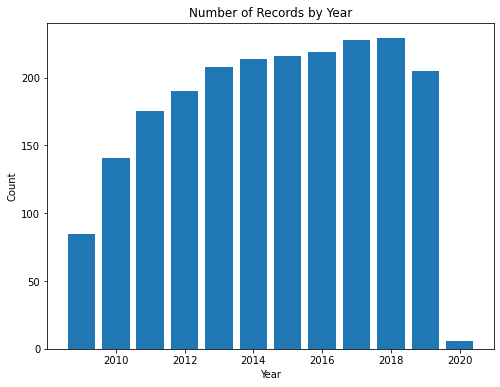

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Records by Year')
plt.show()

The most common tax year in the dataset is 2018, so lets filter our dataset to focus solely on that year. 

In [24]:
target_year = 2018

In [25]:
df_filled = df_filled[df_filled['tax_year'] == target_year]

In [26]:
df_filled.head(20)

,aptify_id,tax_year,year_formation,total_employees,total_volunteers,total_contributions,total_program_service_revenue,investment_income,other_revenue,total_revenue,...,other_expenses__3__expenses,program_services_revenue,contributions,total_statement_functional_program_service_expenses,multiple_irs_match,balance_total_liabilities,total_statement_functional_expenses,temporarily_restricted_net_assets,program_service_revenue__0__related_or_exempt_function_income,target
1,27703,2018,1922.0,12,50.0,440618.0,2.398380e+05,3694.0,46926,731076,...,24862.000000,239838,440618.0,160912,False,54462,484301,3.056620e+07,1.980042e+06,0
8,54460,2018,1965.0,34,88.0,890881.0,1.933970e+05,917476.0,-21505,1980249,...,111687.000000,193397,890881.0,1937119,False,272316,2199592,5.840962e+06,1.933970e+05,1
14,47708,2018,1984.0,11,0.0,2595833.0,2.851673e+06,1273.0,-24775,2572331,...,50693.000000,0,2595833.0,1501049,False,1056465,2577181,4.856580e+05,1.980042e+06,1
24,32078,2018,1968.0,119,100.0,1730086.0,9.504500e+04,87762.0,-27374,1885519,...,41864.000000,95045,1730086.0,1732134,False,964784,2074592,3.450000e+04,6.686800e+04,1
30,41523,2018,1938.0,139,321.0,10003978.0,1.674304e+06,419012.0,487115,12584409,...,108341.000000,1674304,10003978.0,7336081,False,3194725,10846533,6.357606e+06,1.405242e+06,0
40,54895,2018,1965.0,32,60.0,460016.0,1.521800e+05,17712.0,192940,822848,...,7921.000000,152180,460016.0,509434,False,50444,737061,5.193400e+04,6.727100e+04,0
46,39873,2018,1924.0,214,11.0,5951414.0,9.760310e+05,889040.0,287669,8104154,...,32318.000000,976031,5951414.0,5474591,False,761889,7014802,1.482526e+07,9.451720e+05,0
57,8855,2018,1986.0,707,228.0,5230230.0,6.472977e+06,77042.0,2179684,13959933,...,13039.000000,6472977,5230230.0,12645752,False,5573938,15439203,4.712984e+06,9.434000e+04,1
68,1855,2018,1973.0,52,175.0,1150357.0,4.895650e+05,18171.0,481567,2139660,...,27950.000000,489565,1150357.0,2281761,False,748076,2856978,1.265543e+06,2.775710e+05,1
77,2253,2018,1969.0,177,400.0,32476911.0,1.165459e+06,3816642.0,833481,38292493,...,227300.000000,1165459,32476911.0,21258252,False,88547416,32536603,7.507031e+07,1.092562e+06,0


In [27]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 2106
Data columns (total 57 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   aptify_id                                                      229 non-null    int64  
 1   tax_year                                                       229 non-null    int64  
 2   year_formation                                                 229 non-null    float64
 3   total_employees                                                229 non-null    int64  
 4   total_volunteers                                               229 non-null    float64
 5   total_contributions                                            229 non-null    float64
 6   total_program_service_revenue                                  229 non-null    float64
 7   investment_income                                            

Now we can see that the dataset is beginning to look good, but there are still some columns that I think should be dropped. Lat and Lon are not meaningful for this model. I also don't think the time based data is useful. Tax year is meaningless now as we have selected only for 2018. RLE was used to create the target so it will be 100% correlated to target. I also found that net income is 100% correlated to target, so I'm dropping that feature too. 

In [28]:
df_filled.drop(["lat", "lon", "revenue_less_expenses", 
                "year_formation", "tax_year", "aptify_id", "net_income"], 
                axis=1, inplace = True)

In [29]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 2106
Data columns (total 50 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   total_employees                                                229 non-null    int64  
 1   total_volunteers                                               229 non-null    float64
 2   total_contributions                                            229 non-null    float64
 3   total_program_service_revenue                                  229 non-null    float64
 4   investment_income                                              229 non-null    float64
 5   other_revenue                                                  229 non-null    int64  
 6   total_revenue                                                  229 non-null    int64  
 7   personnel_expenses                                           

## Correlation Matrix
Lets take a look at the correlations between variables

In [30]:
correlation_matrix = df_filled.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                                    total_employees  \
total_employees                                            1.000000   
total_volunteers                                           0.818315   
total_contributions                                        0.912636   
total_program_service_revenue                              0.783254   
investment_income                                          0.708105   
other_revenue                                              0.853198   
total_revenue                                              0.952216   
personnel_expenses                                         0.952532   
total_expenses                                             0.952048   
total_assets                                               0.865697   
total_liabilities                                          0.927590   
net_assets                                                 0.839839   
other_expenses__0__expenses                              

Wow that's a lot of info! We can expect that because the correlation matrix provides a value for each columns relationship to another column. Since we have over 50 columns, that's a lot of data. Lets take a closer look at highly correlated values. 

In [31]:
threshold = 0.90

I was not familiar with masking the upper triangle of the matrix, but I used chat gpt to help me understand how best to do this. The code below helps to highlight the variable pairs that are correlated above the 90% threshold, while removing the variable pairs that are correlated to themselves. 

In [32]:


# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to get the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.mask(mask)

# Filter for variables with correlation values above the threshold
highly_correlated_variables = (upper_triangle.abs() > threshold)

# Print the highly correlated variable pairs and their correlation values
print("Highly correlated variable pairs:")
for variable1 in highly_correlated_variables.columns:
    correlated_vars = highly_correlated_variables.index[highly_correlated_variables[variable1]].tolist()
    for variable2 in correlated_vars:
        correlation_value = correlation_matrix.loc[variable1, variable2]
        print(f"{variable1} - {variable2}: {correlation_value}")

Highly correlated variable pairs:
total_employees - total_contributions: 0.9126357202575048
total_employees - total_revenue: 0.952216080753201
total_employees - personnel_expenses: 0.9525317560981633
total_employees - total_expenses: 0.9520479215213116
total_employees - total_liabilities: 0.9275902357808217
total_employees - total_functional_expenses: 0.9543987154083938
total_employees - other_salaries_and_wages: 0.948211976261503
total_employees - land_bldg_equip_cost_or_other_basis: 0.9365837904937708
total_employees - unrestricted_net_assets: 0.9205753541977078
total_employees - total_statement_functional_management_and_general_expenses: 0.9388097012385731
total_employees - total_statement_functional_fundrasing_expenses: 0.9347168812792516
total_employees - program_service_accomplishments__0__expenses: 0.9691957236345283
total_employees - contributions: 0.9126357202575048
total_employees - total_statement_functional_program_service_expenses: 0.953304244976154
total_employees - balan

Still a lot of high correlation, but this shouldn't be too surprising because the tax document is asking for a lot of financial data that is related to each other, for instance, "unrestricted_net_assets - net_assets_or_fund_balances." But are any of these highly correlated to the target? After playing with the threshold, I learn that even at a very low threshold like .3, there are no variables clearing the threshold. 

In [33]:
correlation_with_target = df.corr()['target'].abs()

threshold = 0.3

highly_correlated_variables = correlation_with_target[correlation_with_target > threshold]

print(highly_correlated_variables)

target    1.0
Name: target, dtype: float64


/var/folders/ry/lx4fw4hj4c58xy781z3_7cbm0000gn/T/ipykernel_6516/634419956.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['target'].abs()


Several variables are highly correlated to each other, but not to the target.

## Fit the model

Now that we understand the correlations and we have a good looking dataset, it's time to fit the model! First, we split the data using train_test_split. Next, we import DecisionTreeClassifier. Then we fit the model to X_train and y_train.

In [34]:
from sklearn.model_selection import train_test_split
X = df_filled.drop('target', axis=1)  # Features (independent variables)
y = df_filled['target']  # Target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Classification Report

Now it is time to see how the model performed. First we want to get our y prediction for X_test. Next, we import necessary sklearn metrics. We print accuracy, which shows the proportion of correctly predicted instances (or observations) out of the total number of instances. We then show a classification report that includes precision, recall, f1 score and support. Precision reports the proportion of correctly predicted true positives. [Precision = True Positives / (True Positives + False Positives)]. Recall focuses on the ability of the model to identify positive instances. A higher recall value indicates a lower rate of false negatives. [Recall = True Positives / (True Positives + False Negatives)]. F1-score combines these: [F1 Score = 2 * (Precision * Recall) / (Precision + Recall)] and support refers to the number of instances in each class in the actual dataset. The Gini Index is a measure of impurity or inequality in a set of class labels within a classification problem. Mean Squared Error (MSE) quantifyies the average magnitude of the prediction errors. The MSE is calculated by taking the average of the squared differences between each predicted value and its corresponding true value. A lower MSE indicates that the predicted values are closer to the true values, implying better model performance.



In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, mean_squared_error
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)    
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
mse = mean_squared_error(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
gini_index = 2 * auc(fpr, tpr) - 1
print("Gini Index:", gini_index)
print("Mean Squared Error:", mse)


Accuracy: 0.5517241379310345
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.64      0.58        28
           1       0.58      0.47      0.52        30

    accuracy                           0.55        58
   macro avg       0.56      0.55      0.55        58
weighted avg       0.56      0.55      0.55        58

Gini Index: 0.10952380952380958
Mean Squared Error: 0.4482758620689655


This classification report is telling me that the decision tree is working. It's not broken because of highly redundant variables. But is it better than guessing? Lets find out by creating a random baseline. I'm going to do this by first getting the unique target classes, then make a function to generate random predictions using the parameter "num_instances". Then, I want to use numpy's random.choice function to randomly select predictions from classes. Then I use the variable true labels to get the length to determine the total number of instances that we want to make predictions for. Then we use baseline predictions to generate random predictions based on number of instances. We compare this to true labels to get baseline accuracy, and then print baseline accuracy. (I used chat gpt to help me with this code and find it really interesting as a breakdown of how prediction works without any of the statistics).

In [40]:
classes = df_filled["target"].unique()
def random_prediction(num_instances):
    return np.random.choice(classes, size=num_instances)
true_labels = df_filled["target"].values
num_instances = len(true_labels)
baseline_predictions = random_prediction(num_instances)
baseline_accuracy = np.sum(baseline_predictions == true_labels) / num_instances
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.4890829694323144


We get around fifty percent accuracy, which tells us that the classifier is slightly better at predicting the target, but not by much. Now lets see if we can make it better!

## Hyperparameter Tuning

In order to tune the hyperparameters, I'm going to use the sklearn module, GridSearchCV, which will take as an argument the variable param_grid. This variable specifies the three parameters that grid search will use to optimize the model: max depth (depth of decision tree) min sample split (minimum number of samples to allow for a split on the tree) and criterion, which uses gini index and entropy. Based on grid search's selection of the best parameters, I went in and expanded the parameters to ensure that there wasn't an artificial bound for maximum accuracy. Now each time I run the code I get a different set of optimized parameters, but the validation score remains slightly over 70%.  

In [41]:
param_grid = {
    'max_depth': [None, 2, 3, 5, 10, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20],
    'criterion': ['gini', 'entropy']
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 10, 12, 15],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20]})

In [44]:
best_params = grid_search.best_params_

In [45]:
best_clf = DecisionTreeClassifier(**best_params)

In [46]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=8)

In [48]:
y_pred = best_clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.9649122807017544


In [53]:
grid_search.fit(X_test, y_test)
best_clf.fit(X_test, y_test)
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9827586206896551


After tuning the hyperparameters we see a dramatic improvement in the model. This looks like it could be too good to be true, so I'll have to explore that possibility in future versions of the project. For now lets have a look at feature importance. 

## Feature Importance

The importance of a feature is determined by the extent to which it reduces the impurity (e.g., Gini impurity) within each node or the decrease in the model's information gain when splitting based on that feature. To look at feature importance I will use sklearn again, and sort importances in descending order in order to get the most important features. Sorted_importances gives me feature importances sorted in descending order. This allows me to generate a bar graph looking at the most important to least important features. Interestingly, the top three features are contributions, executive compensation and land/building/equipment costs. This order is the same for X_train and X_test. 

In [59]:
importances = model.feature_importances_

In [60]:
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

In [61]:
feature_names = X_test.columns[sorted_indices]

In [62]:
print(sorted_importances)

[0.1947016  0.12470651 0.07811429 0.07505127 0.06914806 0.06000451
 0.04715396 0.04321754 0.04290501 0.0412531  0.0408364  0.03395663
 0.03274056 0.02571622 0.02514475 0.02283654 0.02145251 0.01123839
 0.00982217 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


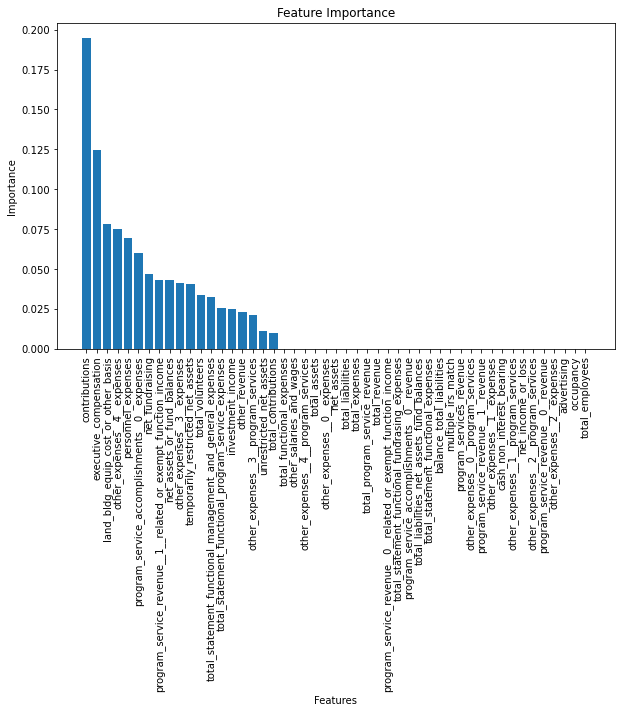

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## Visualize

Now lets take a look at the decision tree to better understand what we've done. I first try to do this with a text version but then find a better visual tool to help look at the tree. 

In [68]:
from sklearn.tree import export_text

In [69]:
tree_rules = export_text(model)
print(tree_rules)

|--- feature_42 <= 2188916.50
|   |--- feature_17 <= 5606392.00
|   |   |--- feature_34 <= 205845.00
|   |   |   |--- feature_33 <= 162872.00
|   |   |   |   |--- feature_43 <= 498038.00
|   |   |   |   |   |--- feature_34 <= 69642.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_34 >  69642.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_43 >  498038.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_33 >  162872.00
|   |   |   |   |--- feature_32 <= 312998.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_32 >  312998.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_34 >  205845.00
|   |   |   |--- feature_1 <= 260.33
|   |   |   |   |--- feature_2 <= 1173157.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1173157.00
|   |   |   |   |   |--- feature_40 <= 15575.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_40 >  15575.50
|   |   |   |   |   |   |--- cl

This is kind of hard to look at, so lets try a different view. 

In [70]:
from sklearn.tree import export_graphviz

In [71]:
import pydotplus
from IPython.display import Image

First lets export the decision tree in DOT format. DOT format for representing graphs, including decision trees, in a human-readable and machine-parseable way. We are going to generate the tree and then turn it into an image, and then display the image. The default is too small to read but if you double click it will expand. 

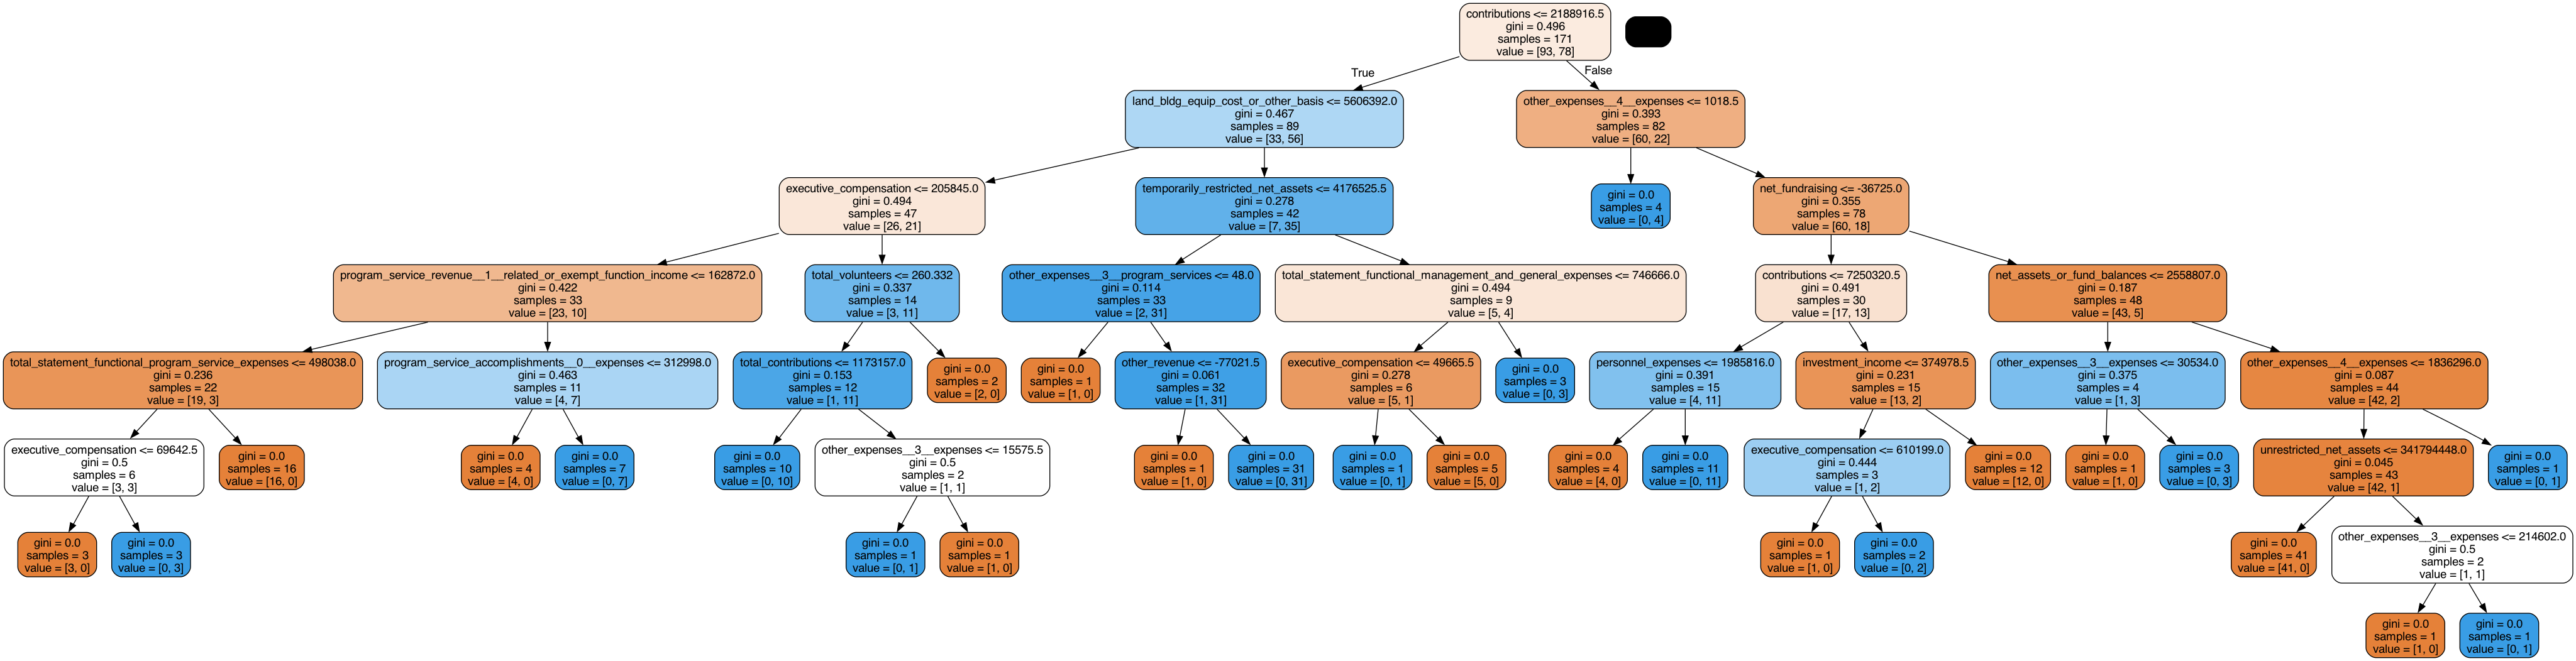

In [72]:
dot_data = export_graphviz(model, out_file=None, feature_names=feature_names, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png("decision_tree.png")

Image(graph.create_png())

I'm struck by the importance of executive compensation. This wasn't a high feature importance before I did the parameter tuning. If accurate, this could be evidence to

In [79]:
threshold = 180000
high_exec_comp = df_filled[df_filled['executive_compensation'] > threshold]  
low_exec_comp = df_filled[df_filled['executive_compensation'] <= threshold]

# Calculate the proportions of financially sustainable museums in each group
prop_high_sustainable = (high_exec_comp['target']==0).mean()
prop_low_sustainable = (low_exec_comp['target']==0).mean()


print("high compensation and sustainable:", prop_high_sustainable)
print("low compensation and sustainable:", prop_low_sustainable)

Proportion of financially sustainable museums with high executive compensation: 0.5555555555555556
Proportion of financially sustainable museums with low executive compensation: 0.4823529411764706


This does not seem as wide of a difference as I would have expected. As I move forward I will experiment more with this. But it does indicate that higher executive pay is more likely to result in financial sustainability. 

## Conclusion

By tuning the hyperparameters, we are able to get a highly predictive model. Future work includes expanding analysis of decision tree outcomes, experimenting with adding and subtracting features, and potentially includeing external features. I would also like to find a way to bring this into streamlit and make it interactive somehow, perhaps generating a tool that would allow users to define target, or which features to include. Feature importance is a fascinating measurement, because it shows which features in a dataset are most likely to predict the target. This can give decision makers in institutions guidance on what is within their control and how best to change outcomes. 